In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

C:\Users\kumar\AppData\Local\Temp\ipykernel_25924\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'Data'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 8005 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

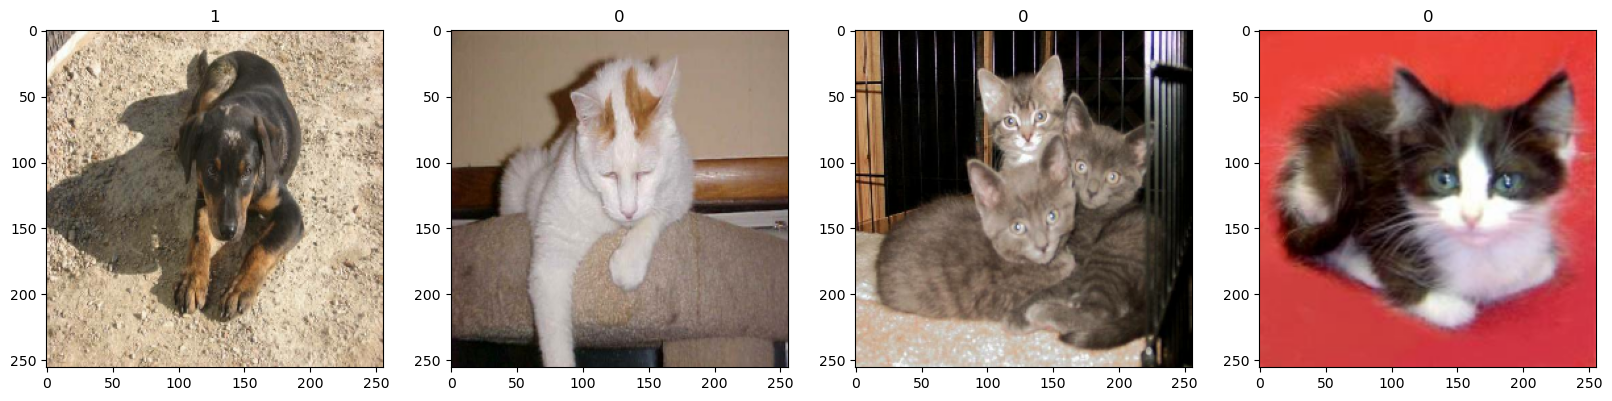

In [12]:
ig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[2.74942368e-01, 3.06314915e-01, 2.63177663e-01],
          [2.80093431e-01, 3.11465979e-01, 2.68328726e-01],
          [2.87737429e-01, 3.19109976e-01, 2.75972724e-01],
          ...,
          [3.17647070e-01, 3.52941185e-01, 2.86274523e-01],
          [3.13653201e-01, 3.45025748e-01, 2.95240223e-01],
          [3.10715377e-01, 3.38598937e-01, 3.05928648e-01]],
 
         [[2.77807623e-01, 3.09180170e-01, 2.66042918e-01],
          [2.82827824e-01, 3.14200372e-01, 2.71063119e-01],
          [2.90471822e-01, 3.21844369e-01, 2.78707117e-01],
          ...,
          [3.20381433e-01, 3.55675548e-01, 2.89008886e-01],
          [3.19697410e-01, 3.51069957e-01, 2.98133463e-01],
          [3.19194227e-01, 3.49943042e-01, 3.06081504e-01]],
 
         [[2.82988667e-01, 3.14361215e-01, 2.71223962e-01],
          [2.88572311e-01, 3.19944859e-01, 2.76807606e-01],
          [2.96216309e-01, 3.27588856e-01, 2.84451604e-01],
          ...,
          [3.22204351e-01, 3.57498467e-01, 2.9083

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

175

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


175/175 [==============================] - 184s 1s/step - loss: 0.6904 - accuracy: 0.5418 - val_loss: 0.6743 - val_accuracy: 0.6131
Epoch 2/10
175/175 [==============================] - 176s 1s/step - loss: 0.6405 - accuracy: 0.6409 - val_loss: 0.6451 - val_accuracy: 0.6569
Epoch 3/10
175/175 [==============================] - 180s 1s/step - loss: 0.5472 - accuracy: 0.7211 - val_loss: 0.5963 - val_accuracy: 0.6988
Epoch 4/10
175/175 [==============================] - 158s 902ms/step - loss: 0.3945 - accuracy: 0.8163 - val_loss: 0.7114 - val_accuracy: 0.6712
Epoch 5/10
175/175 [==============================] - 74s 411ms/step - loss: 0.2106 - accuracy: 0.9177 - val_loss: 0.8782 - val_accuracy: 0.6944
Epoch 6/10
175/175 [==============================] - 42s 240ms/step - loss: 0.1160 - accuracy: 0.9620 - val_loss: 1.0611 - val_accuracy: 0.7013
Epoch 7/10
175/175 [==============================] - 42s 239ms/step - loss: 0.0513 - accuracy: 0.9879 - val_loss: 1.5439 - val_accur

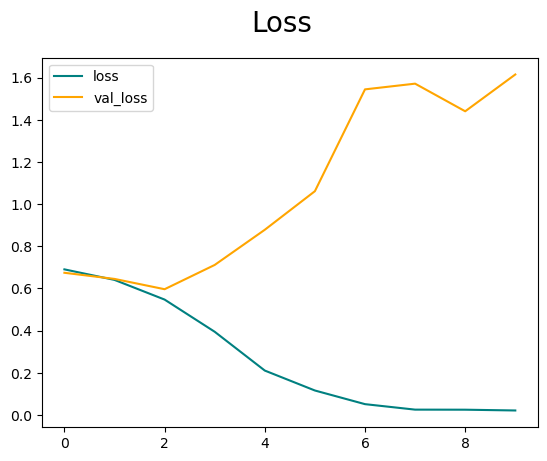

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

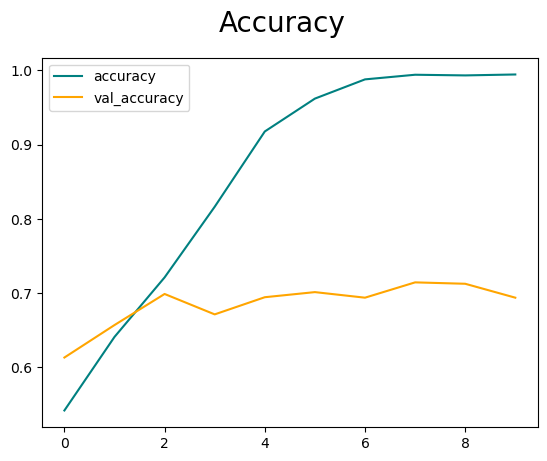

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 75ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.6086956, shape=(), dtype=float32) tf.Tensor(0.5833333, shape=(), dtype=float32) tf.Tensor(0.64375, shape=(), dtype=float32)


# Test

In [33]:
import cv2

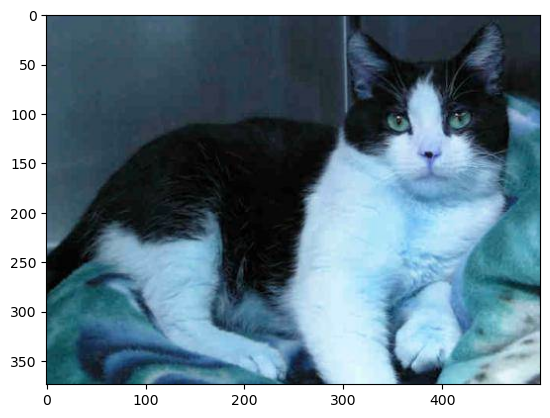

In [48]:
img = cv2.imread('cat.4062.jpg')
plt.imshow(img)
plt.show()

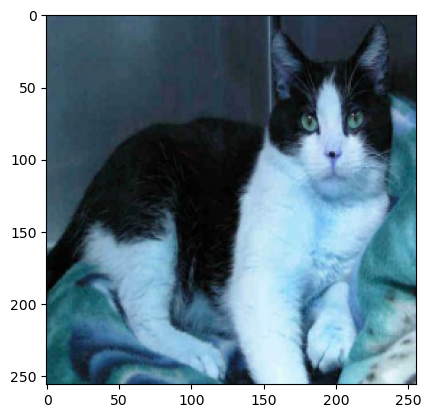

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [51]:
yhat

array([[0.25545362]], dtype=float32)

In [52]:
if yhat > 0.5: 
    print(f'Predicted class is Dod')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat


# saving model

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\kumar\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
new_model = load_model('models\imageclassifier.h5')

In [42]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 93ms/step


array([[0.94015884]], dtype=float32)